In [1]:
# Standard imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# Statistic imports

from scipy import stats

#Plotting imports
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

#To give a white background to the visualization
sns.set_style('whitegrid')

%matplotlib inline

In [5]:
from pandas_datareader import DataReader
from datetime import datetime

In [6]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

In [10]:
start = datetime(end.year-1,end.month,end.day)
start

datetime.datetime(2018, 7, 14, 0, 0)

In [12]:
for  stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [13]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-16,1841.949951,1814.449951,1821.949951,1822.489990,5466200,1822.489990
2018-07-17,1851.689941,1797.380005,1811.560059,1843.930054,5682900,1843.930054
2018-07-18,1858.880005,1831.270020,1848.000000,1842.920044,4861900,1842.920044
2018-07-19,1841.000000,1811.270020,1829.459961,1812.969971,4676900,1812.969971
2018-07-20,1834.839966,1810.060059,1825.010010,1813.699951,3884400,1813.699951


In [14]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,1797.288160,1755.158121,1777.997916,1776.692522,5.343406e+06,1776.692522
std,139.721037,149.590327,145.362233,144.736037,2.326357e+06,144.736037
min,1396.030029,1307.000000,1346.000000,1343.959961,1.690300e+06,1343.959961
25%,1675.522522,1627.010010,1656.079987,1656.309967,3.650450e+06,1656.309967
50%,1826.315002,1781.315002,1811.290039,1810.484985,4.700200e+06,1810.484985
75%,1914.162445,1878.027466,1899.625000,1897.422455,6.408000e+06,1897.422455
max,2050.500000,2013.000000,2038.109985,2039.510010,1.496380e+07,2039.510010


In [15]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-07-16 to 2019-07-12
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null int64
Adj Close    250 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


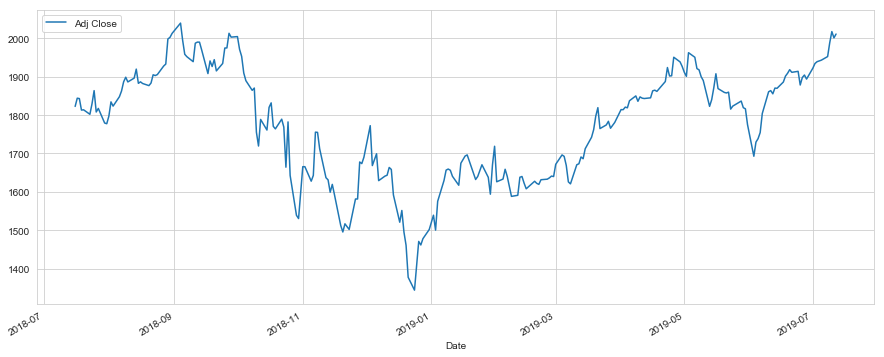

In [19]:
AMZN['Adj Close'].plot(legend = True, figsize = (15,6))

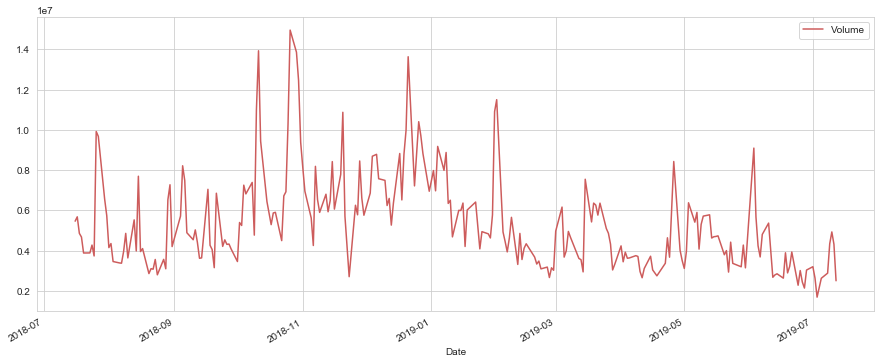

In [21]:
AMZN['Volume'].plot(legend = True, figsize = (15,6), color = 'indianred')

In [24]:
#Moving Averages: 

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()
    

In [27]:
AMZN.head(20)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-07-16,1841.949951,1814.449951,1821.949951,1822.489990,5466200,1822.489990,NaN,NaN,NaN
2018-07-17,1851.689941,1797.380005,1811.560059,1843.930054,5682900,1843.930054,NaN,NaN,NaN
2018-07-18,1858.880005,1831.270020,1848.000000,1842.920044,4861900,1842.920044,NaN,NaN,NaN
2018-07-19,1841.000000,1811.270020,1829.459961,1812.969971,4676900,1812.969971,NaN,NaN,NaN
2018-07-20,1834.839966,1810.060059,1825.010010,1813.699951,3884400,1813.699951,NaN,NaN,NaN
2018-07-23,1819.000000,1769.989990,1812.209961,1802.000000,3888500,1802.000000,NaN,NaN,NaN
2018-07-24,1840.000000,1809.380005,1829.010010,1829.239990,4278700,1829.239990,NaN,NaN,NaN
2018-07-25,1863.839966,1822.640015,1829.300049,1863.609985,3738200,1863.609985,NaN,NaN,NaN
2018-07-26,1844.680054,1804.500000,1839.000000,1808.000000,9924400,1808.000000,NaN,NaN,NaN


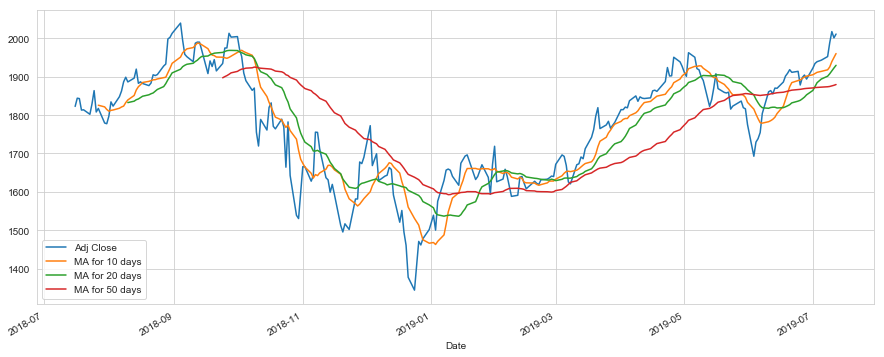

In [29]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (15,6))

In [30]:
#Finding daily returns - pandas has an inbuilt method called pct_change (Percent change) 

AMZN['Daily Returns'] = AMZN['Adj Close'].pct_change()

In [31]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
Date,,,,,,,,,,
2018-07-16,1841.949951,1814.449951,1821.949951,1822.489990,5466200,1822.489990,NaN,NaN,NaN,NaN
2018-07-17,1851.689941,1797.380005,1811.560059,1843.930054,5682900,1843.930054,NaN,NaN,NaN,0.011764
2018-07-18,1858.880005,1831.270020,1848.000000,1842.920044,4861900,1842.920044,NaN,NaN,NaN,-0.000548
2018-07-19,1841.000000,1811.270020,1829.459961,1812.969971,4676900,1812.969971,NaN,NaN,NaN,-0.016251
2018-07-20,1834.839966,1810.060059,1825.010010,1813.699951,3884400,1813.699951,NaN,NaN,NaN,0.000403


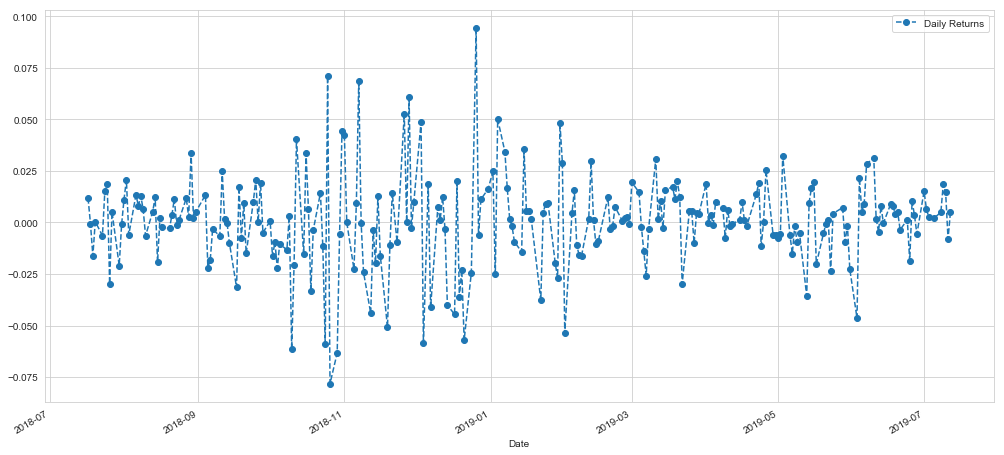

In [33]:
AMZN['Daily Returns'].plot(figsize = (17,8),legend = True, linestyle = '--', marker = 'o')

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

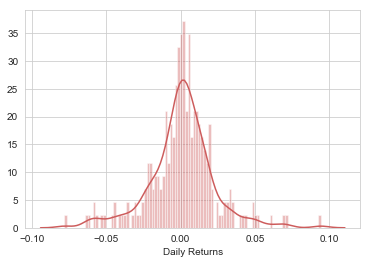

In [37]:
sns.distplot(AMZN['Daily Returns'],bins = 100, color = 'indianred')

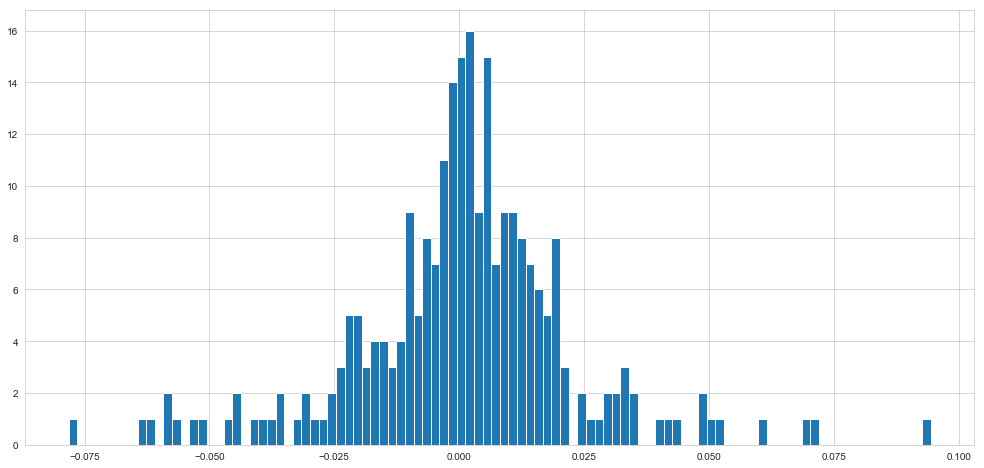

In [39]:
AMZN['Daily Returns'].hist(bins = 100, figsize = (17,8))

In [40]:
AMZN['Daily Returns'].describe()

count    249.000000
mean       0.000644
std        0.022328
min       -0.078197
25%       -0.009334
50%        0.001347
75%        0.011308
max        0.094452
Name: Daily Returns, dtype: float64

In [62]:
positive_returns = AMZN[(AMZN['Daily Returns']>0)]
positive_returns['Daily Returns'].describe()

count    136.000000
mean       0.014669
std        0.015702
min        0.000057
25%        0.004368
50%        0.010116
75%        0.018781
max        0.094452
Name: Daily Returns, dtype: float64

In [63]:
negative_returns = AMZN[(AMZN['Daily Returns']<=0 )]
negative_returns['Daily Returns'].describe()

count    113.000000
mean      -0.016236
std        0.016744
min       -0.078197
25%       -0.022653
50%       -0.010125
75%       -0.003592
max        0.000000
Name: Daily Returns, dtype: float64

In [65]:
#Now to compare closing price of all tech stocks

closing_df = DataReader(stock_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-16,188.047531,1822.489990,1183.859985,103.233643
2018-07-17,188.579453,1843.930054,1198.800049,104.257019
2018-07-18,187.545181,1842.920044,1195.880005,103.440285
2018-07-19,189.003006,1812.969971,1186.959961,102.731789
2018-07-20,188.569595,1813.699951,1184.910034,104.571907


In [66]:
tech_returns = closing_df.pct_change()
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-16,NaN,NaN,NaN,NaN
2018-07-17,0.002829,0.011764,0.012620,0.009913
2018-07-18,-0.005485,-0.000548,-0.002436,-0.007834
2018-07-19,0.007773,-0.016251,-0.007459,-0.006849
2018-07-20,-0.002293,0.000403,-0.001727,0.017912


C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


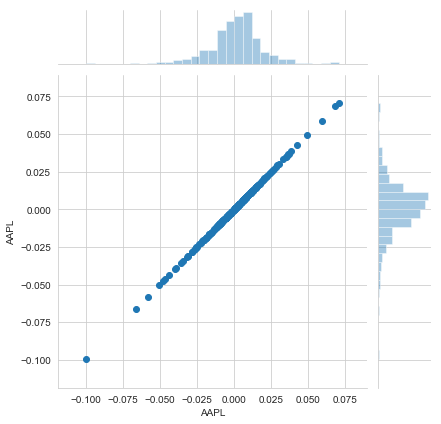

In [68]:
#To find correlation between the two stock's daily returns

sns.jointplot('AAPL','AAPL',kind = 'scatter', data = tech_returns)

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


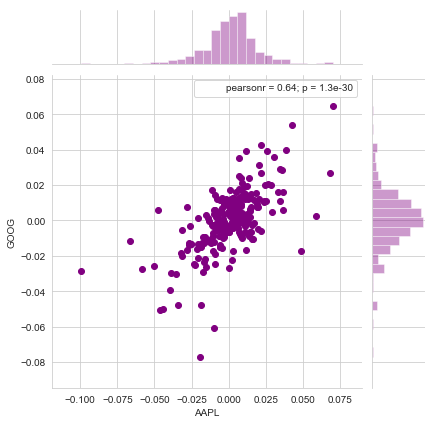

In [70]:
apple_google = sns.jointplot('AAPL','GOOG',kind = 'scatter', data = tech_returns, color = 'purple')
apple_google.annotate(stats.pearsonr)
plt.show()

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


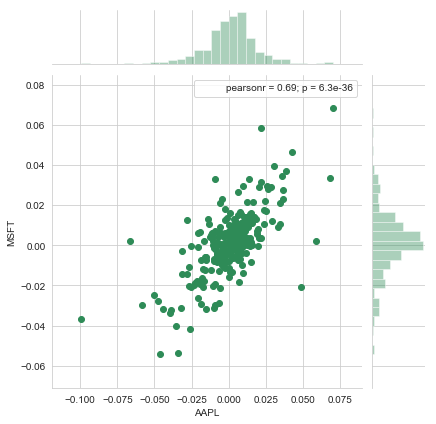

In [71]:
apple_microsoft = sns.jointplot('AAPL','MSFT',kind = 'scatter', data = tech_returns, color = 'seagreen')
apple_microsoft.annotate(stats.pearsonr)
plt.show()